# 📘 Class 1: Understanding Tools & Actions in AI Agents

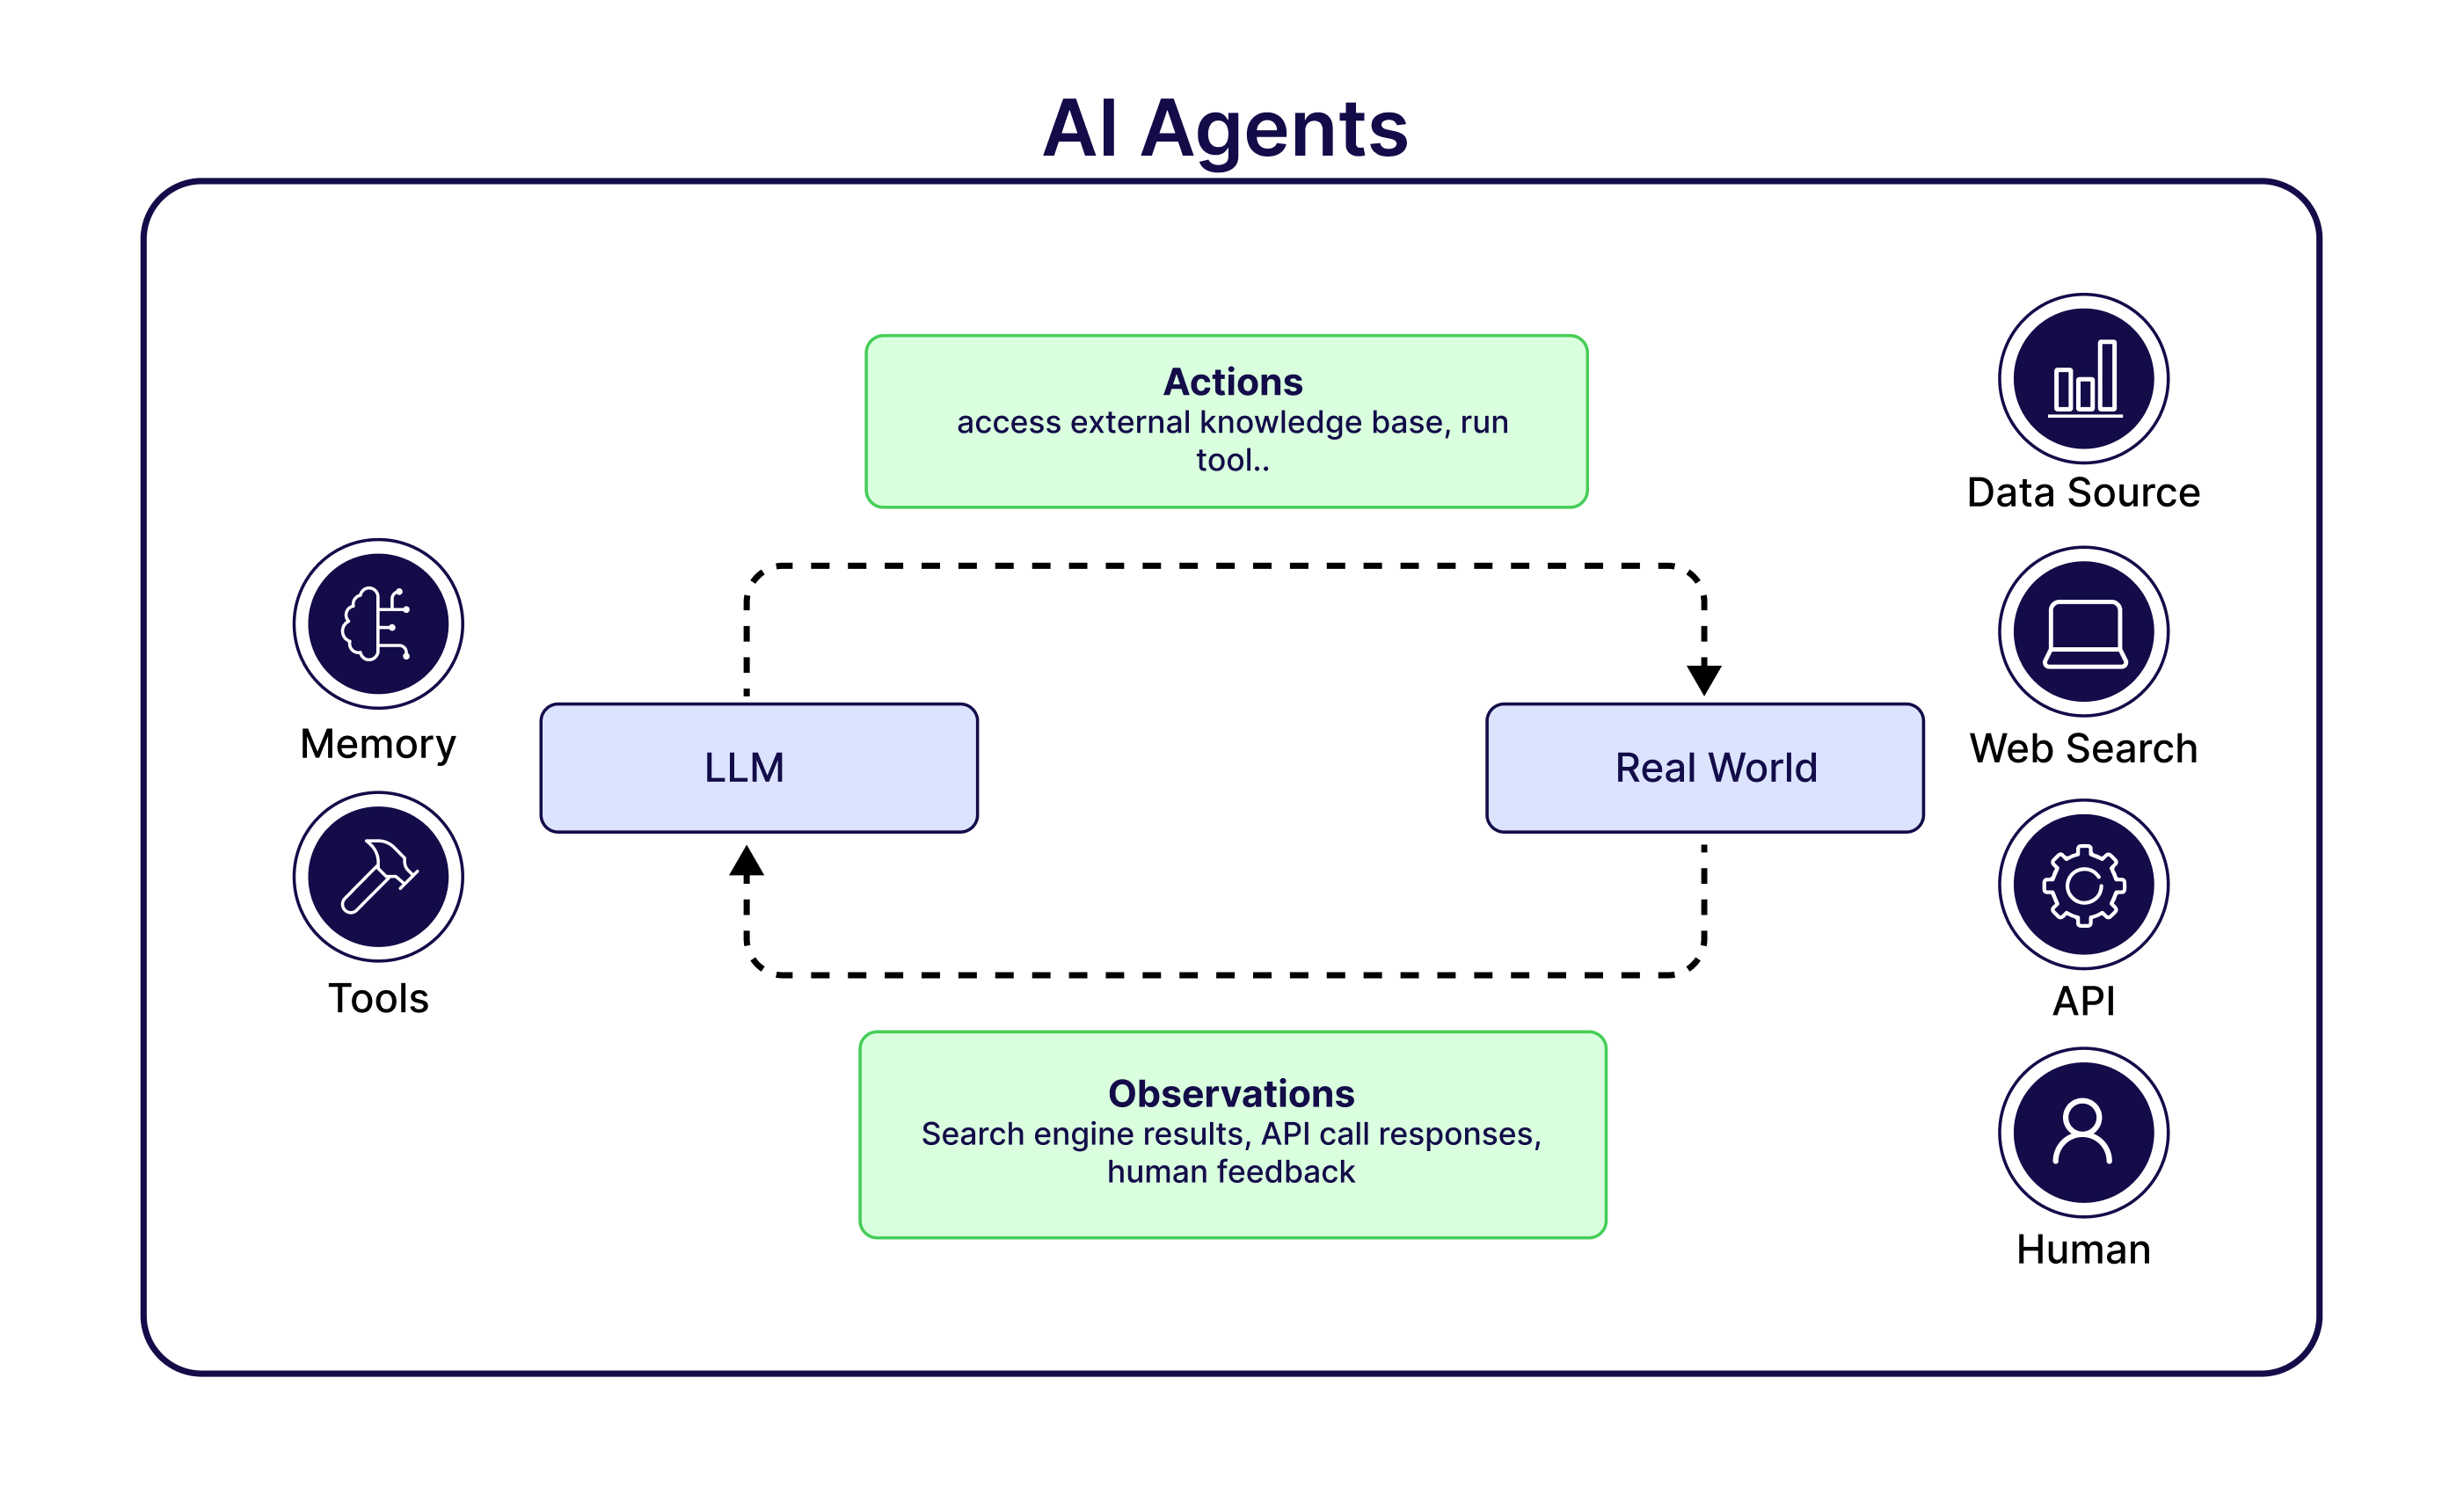

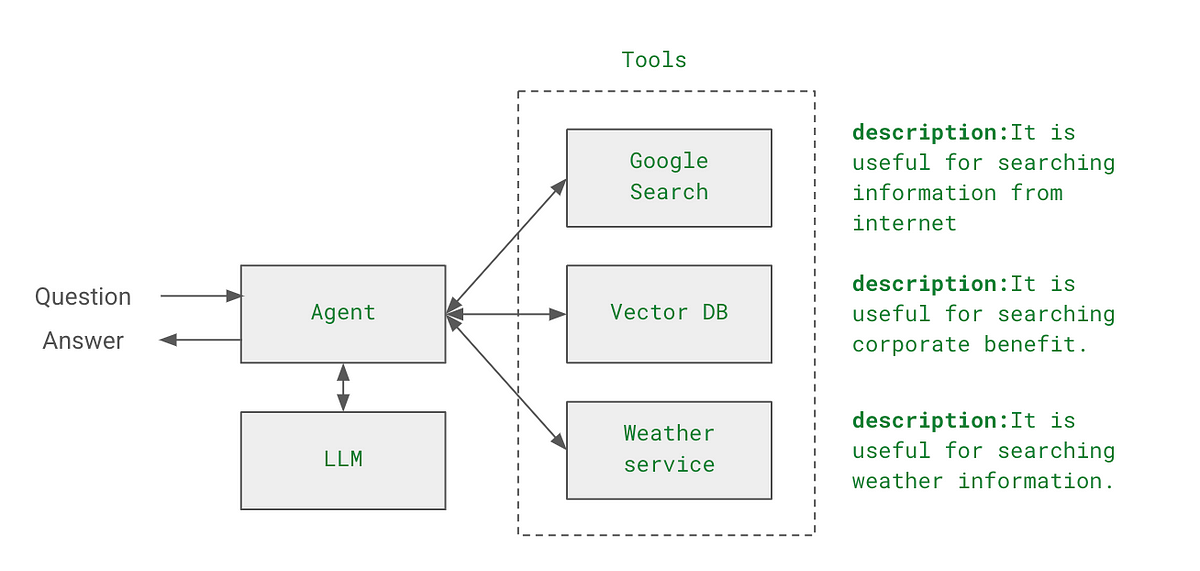

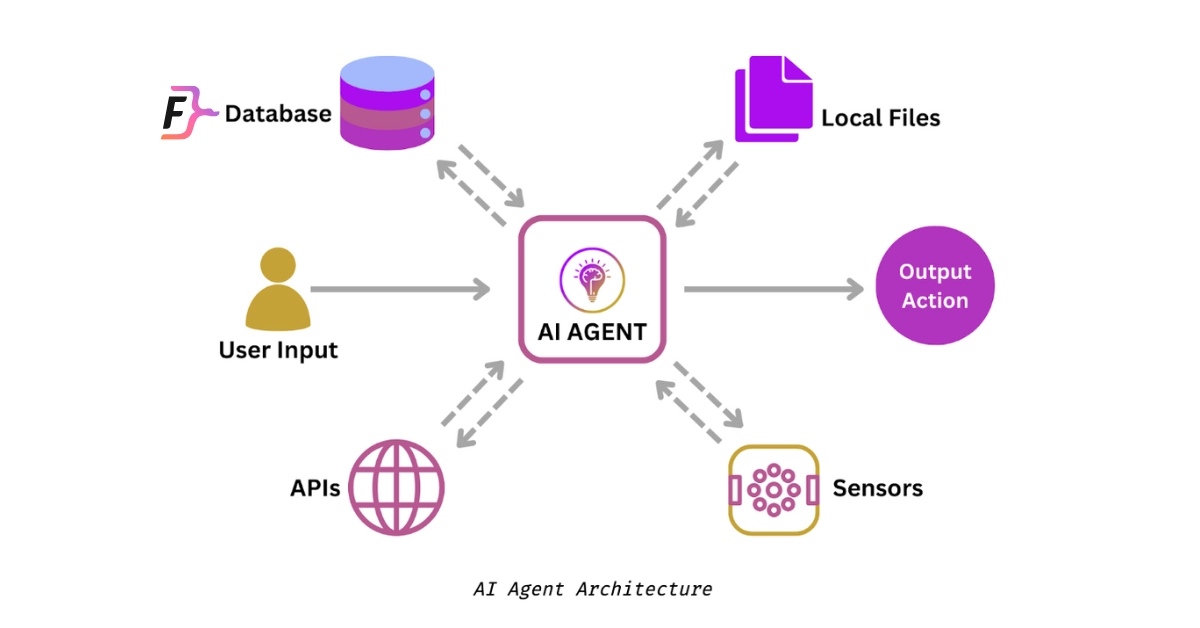

## 🧠 Why Do AI Agents Need Tools?

LLMs are powerful at reasoning and language understanding, but they **lack real-world interaction** capabilities:

- They can't access up-to-date info (e.g., weather, news)
- They can't do calculations reliably (especially complex math)
- They can't browse files, use APIs, or take actions by themselves

To overcome this, we give agents **tools**—external functions they can call to solve tasks.

In [ ]:
# func(parameter) "Doc String"

## 🔧 What is a Tool?

A tool is simply a function or an API that an agent can use.
Each tool has:

- A **name**
- A **description**
- An **input schema**
- A **function to execute**

The agent selects a tool when it decides it needs help.

## 🧰 Example Tools to Add:

- **Calculator** – for math tasks
- **Web Search** – for real-time info
- **File Reader** – for reading PDFs or CSVs
- **API Fetcher** – custom APIs like weather, stock prices, etc.

## 🧪 Hands-on: Setting Up a Simple Tool-based Agent

In [ ]:
!pip install langchain openai langchain-core langchain-community langchain_openai

In [ ]:
from langchain.agents import initialize_agent, Tool
from langchain.agents.agent_types import AgentType
from langchain_openai import ChatOpenAI
from langchain.utilities import SerpAPIWrapper

### 🔎 Web Search Tool

In [ ]:
!pip install google-search-results

https://serpapi.com/manage-api-key

In [ ]:
# 2 types of tool

# 1 . Already Built (Websearch -> google Serp , Duckduckgo , Braver )
# 2 . Custom (api , filesystem , Weather api , database ..)

In [ ]:
import os
os.environ["SERPAPI_API_KEY"] = ""
search = SerpAPIWrapper(serpapi_api_key=os.environ.get("SERPAPI_API_KEY"))

search_tool = Tool(
    name="Search",
    func=search.run,
    description="Useful for answering questions about current events or real-time info"
)

### 🌐 Alternative: DuckDuckGo Tool

In [ ]:
# from langchain.tools import DuckDuckGoSearchRun

# search_tool = Tool(
#     name="DuckDuckGo Search",
#     func=DuckDuckGoSearchRun().run,
#     description="Search for current information using DuckDuckGo"
# )

### 🧠 Initialize the Agent

In [ ]:
os.environ['GITHUB_TOKEN'] = ""
token = os.environ.get("GITHUB_TOKEN")
endpoint = "https://models.github.ai/inference"
model_name = "openai/gpt-4.1-nano"

if not token:
    raise ValueError("GITHUB_TOKEN environment variable not set. Please provide a valid token.")

llm = ChatOpenAI(
    model_name=model_name,
    openai_api_key=token,
    openai_api_base=endpoint,
    temperature=0.5,

)


In [ ]:
!pip install pytz

In [ ]:
# Linkedin Post -> Num of character (800 Char) , Example(2) , Styling ( ) , Post -> image generate
# 1. Chain  AI AGENT ->  KNOWLEDGE (5 AI AGENT 5 RAG 5 MCP) -> 5 Agent -> RAG -> CHunk / Context -> RAG

In [ ]:
import pytz
from datetime import datetime

def get_current_time(query: str) -> str:
    """Returns the current time in Asia/Dhaka time zone."""
    dhaka_tz = pytz.timezone('Asia/Dhaka')
    now = datetime.now(dhaka_tz)
    return now.strftime("%Y-%m-%d %H:%M:%S %Z%z") # Adding date, timezone name and offset for clarity

time_tool = Tool(
    name="Current Time",
    func=get_current_time,
    description="Useful for answering questions about the current time in Asia/Dhaka time zone."
)

print("Time tool updated successfully for Asia/Dhaka!")

Time tool updated successfully for Asia/Dhaka!


In [ ]:
get_current_time("Asia/Dhaka")

'2025-07-19 22:22:12 +06+0600'

In [ ]:
from langchain.agents import initialize_agent, Tool
from langchain.agents.agent_types import AgentType
from langchain_openai import ChatOpenAI
from langchain.utilities import SerpAPIWrapper
import os
import pytz
from datetime import datetime

# Assuming search_tool and time_tool are defined in previous cells
# os.environ["SERPAPI_API_KEY"] = "YOUR_SERPAPI_API_KEY" # Make sure your API keys are set

os.environ['GITHUB_TOKEN'] = ""
token = os.environ.get("GITHUB_TOKEN")
endpoint = "https://models.github.ai/inference"
model_name = "openai/gpt-4.1-nano"

if not token:
    raise ValueError("GITHUB_TOKEN environment variable not set. Please provide a valid token.")

llm = ChatOpenAI(
    model_name=model_name,
    openai_api_key=token,
    openai_api_base=endpoint,
    temperature=0.5,
)

agent = initialize_agent(
    tools=[search_tool,time_tool],
    llm=llm,
    agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION, # Changed agent type
    max_iterations=4, # Increased max iterations just in case
    verbose=True,
    handle_parsing_errors=True
)

In [ ]:
print(AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION)

AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION


### ▶️ Run the Agent

In [ ]:
# 7 din Data collect : Types : , SearchAPI()-> Top

In [ ]:
response = agent.run("What is the current time?")
print(response)



> Entering new AgentExecutor chain...
{
  "action": "Current Time",
  "action_input": "Asia/Dhaka"
}

> Finished chain.
{
  "action": "Current Time",
  "action_input": "Asia/Dhaka"
}


In [ ]:
response = agent.run("tell me about Bangladesh last odi match?")
print(response)



> Entering new AgentExecutor chain...
Thought: I need to find the most recent ODI match involving Bangladesh to provide accurate details.
Action:
```
{
  "action": "Search",
  "action_input": "Bangladesh last ODI match"
}
```
Observation: {'title': 'Bangladesh national cricket team', 'thumbnail': 'https://serpapi.com/searches/687bbb1d0558c01cf1d82c79/images/48a815f4ece2b73f74663a0f7ac4b1d06965a65873da192c76f9bdced7a1a458.png', 'game_spotlight': {'stadium': 'Pallekele International Cricket Stadium', 'stadium_kgmid': '/m/09g8kj6', 'stage': 'ODI 3 of 3 (Sri Lanka wins 2 to 1)', 'date': 'Tue, Jul 8, 4:00\u202fAM', 'video_highlight_carousel': [{'title': 'Match highlights', 'link': 'https://webstories.sonyliv.com/stories/slvsban2025-sri-lanka-vs-bangladesh-2025-3rd-odi/sri-lanka-vs-bangladesh-08-jul-2025-1751965562531.html', 'thumbnail': 'https://ssl.gstatic.com/onebox/media/sports/videos/vita/K9tuj5eWflxGnSCK_768x432.jpg'}], 'teams': [{'name': 'Sri Lanka', 'thumbnail': 'https://ssl.gstati

In [ ]:
# Linkedin Search -> API

In [ ]:
!pip install openai-agents

In [ ]:
import os
from openai import AsyncOpenAI
from agents import Agent, Runner, OpenAIChatCompletionsModel
from google.colab import userdata


os.environ["GITHUB_TOKEN"] = token

# Get the token and endpoint
token = os.environ.get("GITHUB_TOKEN")
endpoint = "https://models.github.ai/inference/v1"  # Your provided endpoint
model_name = "openai/gpt-4.1-nano"  # Your specified model

# Validate token
if not token:
    raise ValueError("GITHUB_TOKEN environment variable not set. Please provide a valid token.")

# Create a custom AsyncOpenAI client for compatibility with agents
client = AsyncOpenAI(
    api_key=token,
    base_url=endpoint
)

# Create the agent with the custom OpenAI client
agent = Agent(
    name="Assistant",
    instructions="You are a helpful assistant",
    model=OpenAIChatCompletionsModel(
        model=model_name,
        openai_client=client
    )
)

# Run the agent in Colab's async environment
result = await Runner.run(agent, "Write a haiku about recursion in programming.")
print(result.final_output)

Self-calling function,  
Endless loop within itself,  
Break the cycle, rise.


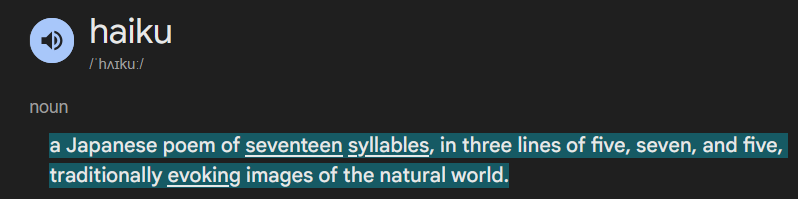

In [ ]:
import pytz
from datetime import datetime
from agents import function_tool # Assuming function_tool is available from the agents library

@function_tool
async def get_current_time(query: str) -> str:
    """Returns the current time in Asia/Dhaka time zone.
    Args:
        query: What time is it?
    Returns:
        Current time in Asia/Dhaka time zone
    """
    dhaka_tz = pytz.timezone('Asia/Dhaka')
    now = datetime.now(dhaka_tz)
    return now.strftime("%Y-%m-%d %H:%M:%S %Z%z") # Adding date, timezone name and offset for clarity

print("Time tool defined using openai-agents format.")

Time tool defined using openai-agents format.


In [ ]:
# Create the agent with the custom OpenAI client
agent2 = Agent(
    name="Assistant",
    instructions="You are a helpful assistant",
    tools=[get_current_time],
    model=OpenAIChatCompletionsModel(
        model=model_name,
        openai_client=client
    ),

)


In [ ]:
# Run the agent in Colab's async environment
result = await Runner.run(agent2, "what time is it?")
print(result.final_output)

The current time is 22:22 on July 19, 2025, in the Asia/Dhaka time zone.


In [ ]:
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
# Load a lightweight sentence transformer model for embeddings
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
# Small vector database with 5 chunks
chunks = [
    "Loops repeat code many times until a condition is met, like a for or while loop.",
    "Variables store data, like numbers or text, to use later in a program.",
    "Functions are reusable blocks of code that perform a specific task.",
    "Conditionals, like if statements, run code only if a condition is true.",
    "Lists hold multiple items, like numbers or strings, in a single variable."
]

# Load a lightweight sentence transformer model for embeddings
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Compute embeddings for the chunks (do this once at startup)
chunk_embeddings = model.encode(chunks)

# Define the vector database retrieval tool
@function_tool
async def retrieve_chunk(query: str) -> str:
    """Retrieves the most relevant chunk from a small vector database based on the query.
    Args:
        query: A string query about a programming concept.
    Returns:
        The most relevant chunk of text from the database.
    """
    # Compute embedding for the query
    query_embedding = model.encode([query])[0]

    # Calculate cosine similarity between query and chunk embeddings
    similarities = cosine_similarity([query_embedding], chunk_embeddings)[0]

    # Get the index of the most similar chunk
    most_similar_idx = np.argmax(similarities)

    # Return the most relevant chunk
    return chunks[most_similar_idx]

In [ ]:
# Create the agent with the custom OpenAI client
agent3 = Agent(
    name="Assistant",
    instructions="You are a helpful assistant",
    tools=[get_current_time,retrieve_chunk],
    model=OpenAIChatCompletionsModel(
        model=model_name,
        openai_client=client
    ),

)


In [ ]:
# Run the agent with a student-friendly task using the new tool
result = await Runner.run(agent3, "Find a chunk about loops in programming.")
print(result.final_output)

I found a chunk about loops in programming: "Loops repeat code many times until a condition is met, like a for or while loop."


In [ ]:
# Run the agent with a student-friendly task using the new tool
result = await Runner.run(agent3, "Find a chunk about List in programming.")
print(result.final_output)

The chunk about List in programming is: "Lists hold multiple items, like numbers or strings, in a single variable."


In [ ]:
# Run the agent with a student-friendly task using the new tool
result = await Runner.run(agent3, "what time is it now?")
print(result.final_output)

The current time is 22:22 in the Asia/Dhaka timezone.


In [ ]:
# # Travling Agent (Planing Hotel Book Flight Book -> Planing tool , Hotel tool , Flight book tool) | 3 AGent
# LLM -> Client ALigned Openai reasoning 4.1 nano | Gemini | Anthropic , Azure Openai AI zero retention,  Finetune

## ✅ Summary

- LLMs can't access real-time info or perform external actions — tools solve that.
- Tools are simple wrappers around functions.
- Agents use tools by planning and deciding when they are needed.
- Today, you built a basic agent with a real-time web search tool!

## 🎯 Homework / Challenge

> Create your own agent with two tools:
> - One tool must fetch current weather using any API
> - One tool must answer math questions (use `llm-math` or a custom calculator function)